In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

from sklearn import metrics

from sklearn.model_selection import train_test_split 

from keras.callbacks import ModelCheckpoint 

from datetime import datetime 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Using TensorFlow backend.


In [2]:
max_pad_len = 68

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print (mfccs.shape)
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [9]:
def print_prediction(file_name):
    prediction_feature = np.array([extract_features(file_name)]) 
        
    if(prediction_feature.any() == None):
        return
        
    prediction_feature = prediction_feature.reshape(prediction_feature.shape[0], 40, max_pad_len, 1)
    
    numpy.savetxt(sys.stdout,prediction_feature)
    
    predicted_vector = np.argmax(model.predict(prediction_feature), axis=1)
    
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
        
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [5]:
# Read csv file 
test_filename = pd.read_csv("new_test_post_competition.csv")

test_filename.loc[test_filename.label != "Bark", 'label'] = "Not_bark"

test_features = []

# Iterate through each sound file and extract the features
for index, row in test_filename.iterrows():
    
    file_name_test = "./audio_test/" + str(row["fname"])
    
    class_label = row["label"]
    data = extract_features(file_name_test)
    
    test_features.append([data, class_label])
    
    
# Convert into a Panda dataframe 
test_featuresdf = pd.DataFrame(test_features, columns=['feature','label'])
test_featuresdf[test_featuresdf.label == "None"] = None
test_featuresdf = test_featuresdf.dropna()
print('Finished feature extraction from ', len(test_featuresdf), ' files')

Finished feature extraction from  4990  files


In [8]:
X = np.array(test_featuresdf.feature.tolist())
y = np.array(test_featuresdf.label.tolist())

# Encode the classification labels
le = LabelEncoder()

y_test = to_categorical(le.fit_transform(y)) 

NameError: name 'test_featuresdf' is not defined

In [7]:
num_rows = 40
num_columns = 68
num_channels = 1

x_test = X.reshape(X.shape[0], num_rows, num_columns, num_channels)

In [6]:
model = load_model("dog_bark_downbalanced.hdf5")

In [18]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy: ", score[1])

156/156 [==============================] - 3s 17ms/step - loss: 0.1910 - accuracy: 0.9481
Testing Accuracy:  0.9480962157249451


In [7]:
filename = "./audio_test/2fefb864.wav"
print_prediction(filename) 

[[[-287.1598     -150.7612      -73.47493    ...    0.
      0.            0.        ]
  [ 149.83682     122.93446     105.20586    ...    0.
      0.            0.        ]
  [ -38.422203    -69.43198     -89.95503    ...    0.
      0.            0.        ]
  ...
  [   3.6465242     4.7347784     1.440897   ...    0.
      0.            0.        ]
  [  14.46809       6.744659      0.44106865 ...    0.
      0.            0.        ]
  [  -8.34921      -6.000855     -4.4152718  ...    0.
      0.            0.        ]]]


NameError: name 'le' is not defined

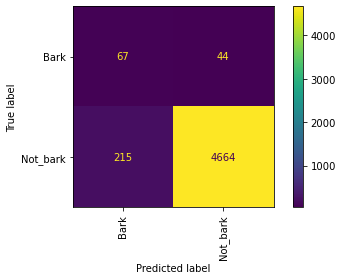

In [22]:
y_pred = model.predict_classes(x_test)

cm = confusion_matrix(le.transform(y), y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot()

cm_fig = disp.figure_
cm_ax = disp.ax_
cm_ax.tick_params(axis='x', rotation=90)
#cm_fig.set_size_inches(20, 20)

cm_fig.tight_layout()
cm_fig.savefig("./test.png",  dpi=600)

In [10]:
# Predict class probabilities
prob_y_2 = model.predict_proba(x_test)

# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

roc_auc_score(le.transform(y), prob_y_2)

NameError: name 'x_test' is not defined

In [67]:
cm_fig.savefig("./test.jpg",  dpi=600)

array(['Oboe', 'Electric_piano', 'Shatter', ..., 'Scissors', 'Cowbell',
       'Clarinet'], dtype='<U21')